In [20]:
## Setup
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from gadm import GADMDownloader
import seaborn as sns

from blackmarblepy.bm_raster import bm_raster
from blackmarblepy.bm_extract import bm_extract

if os.path.exists("/Users/robmarty/Desktop/bearer_bm.csv"):
    bearer = pd.read_csv("/Users/robmarty/Desktop/bearer_bm.csv")['token'][0]
else:
    bearer == "BEARER TOKEN HERE"

## Get Region of Interest - Ghana
downloader = GADMDownloader(version="4.0")

country_name = "Ghana"
ghana_adm1 = downloader.get_shape_data_by_country_name(country_name=country_name, 
                                                       ad_level=1)

In [9]:
## Raster
r = bm_raster(roi_sf = ghana_adm1,
              product_id = "VNP46A4",
              date = 2022, 
              bearer = bearer)

Downloading: VNP46A4.A2022001.h17v07.001.2023081124022.h5
Downloading: VNP46A4.A2022001.h17v08.001.2023081124059.h5
Downloading: VNP46A4.A2022001.h18v07.001.2023081223927.h5
Downloading: VNP46A4.A2022001.h18v08.001.2023082112122.h5


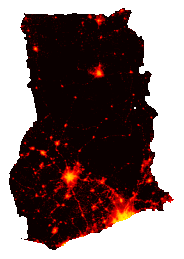

In [16]:
r_np = r.read(1)
r_np = np.log(r_np+1)

plt.imshow(r_np, cmap='hot')
plt.tight_layout()
plt.axis("off")
plt.savefig("../raster_example.png", dpi = 500, bbox_inches='tight')

In [18]:
ntl_df = bm_extract(roi_sf = ghana_adm1,
                    product_id = "VNP46A4",
                    date = list(range(2012, 2023)),
                    bearer = bearer)

Downloading: VNP46A4.A2012001.h17v07.001.2021124115841.h5
Downloading: VNP46A4.A2012001.h17v08.001.2021124121320.h5
Downloading: VNP46A4.A2012001.h18v07.001.2021124121239.h5
Downloading: VNP46A4.A2012001.h18v08.001.2021124115800.h5
Downloading: VNP46A4.A2013001.h17v07.001.2021120232713.h5
Downloading: VNP46A4.A2013001.h17v08.001.2021120141406.h5
Downloading: VNP46A4.A2013001.h18v07.001.2021119113524.h5
Downloading: VNP46A4.A2013001.h18v08.001.2021119114943.h5
Downloading: VNP46A4.A2014001.h17v07.001.2021117183820.h5
Downloading: VNP46A4.A2014001.h17v08.001.2021119114632.h5
Downloading: VNP46A4.A2014001.h18v07.001.2021117184457.h5
Downloading: VNP46A4.A2014001.h18v08.001.2021117184219.h5
Downloading: VNP46A4.A2015001.h17v07.001.2021119013355.h5
Downloading: VNP46A4.A2015001.h17v08.001.2021119020717.h5
Downloading: VNP46A4.A2015001.h18v07.001.2021119011422.h5
Downloading: VNP46A4.A2015001.h18v08.001.2021119021051.h5
Downloading: VNP46A4.A2016001.h17v07.001.2021120141612.h5
Downloading: V

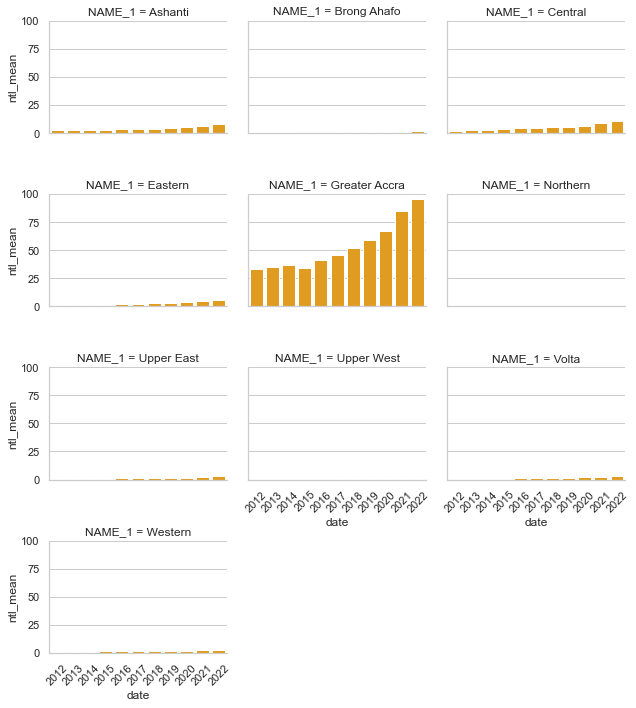

In [21]:
sns.set(style="whitegrid")
g = sns.catplot(data=ntl_df, kind="bar", x="date", y="ntl_mean", col="NAME_1", height=2.5, col_wrap = 3, aspect=1.2, color = "orange")

# Set the x-axis rotation for better visibility
g.set_xticklabels(rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
#plt.show()
plt.savefig("../trends_example.png", dpi = 500, bbox_inches='tight')